# Technical analysis

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

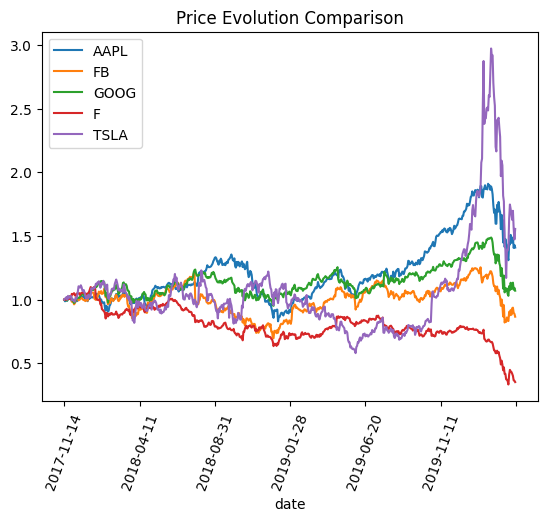

In [5]:
companies = ['AAPL','FB','GOOG','F','TSLA']
listofdf = []
for item in companies:
    histprices = requests.get(f"https://financialmodelingprep.com/api/v3/historical-price-full/{item}?serietype=line")
    histprices = histprices.json()

    #Parse the API response and select only last 600 days of prices
    histprices = histprices['historical'][-600:]
    #Convert from dict to pandas datafram
    histpricesdf = pd.DataFrame.from_dict(histprices)
    #rename column
    histpricesdf = histpricesdf.rename({'close': item}, axis=1)
    #append all dfs to list
    listofdf.append(histpricesdf)

#set index of each DataFrame by common column before concatinating them
dfs = [df.set_index('date') for df in listofdf]

histpriceconcat = pd.concat(dfs,axis=1)

#divide all dataframe by first line of data to enable comparison
histpriceconcat = histpriceconcat/histpriceconcat.iloc[0]


for i, col in enumerate(histpriceconcat.columns):
    histpriceconcat[col].plot()

plt.title('Price Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(histpriceconcat.columns)
plt.gcf()